# COVID-19 X-ray images
## About
This dataset is a database of COVID-19 cases with chest X-ray or CT images. It contains COVID-19 cases as well as MERS, SARS, and ARDS.

# Name:-Darpan Relan

# Project Name:-Covid-19 Image Classification

# Institute Name:-Board Infinity

# Submitted To:-Mr. Shrikant


## Importing Libraries & Packages

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
from PIL import Image
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.models import Sequential,Model
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.optimizers import Adam,SGD,RMSprop
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
import tensorflow as tf
import os
%matplotlib inline

Using TensorFlow backend.
C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Future

## importing images directory

In [2]:
data_img="D:\\DATA SCIENCE\\T-6 MACHINE LEARNING\\Materials\\Covid-19 Image Classification\\dataset"
data_img

'D:\\DATA SCIENCE\\T-6 MACHINE LEARNING\\Materials\\Covid-19 Image Classification\\dataset'

In [3]:
os.listdir(data_img)

['.ipynb_checkpoints',
 'covid',
 'COVID-19 Image Classification Capstone Project.ipynb',
 'normal']

In [4]:
import matplotlib.image as mpimg

In [5]:
import glob
normal_images = []
for img_path in glob.glob(data_img + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))

    
normal_images    

[array([[103, 106, 109, ..., 116, 115, 111],
        [107, 106, 105, ..., 114, 110, 105],
        [108, 106, 104, ..., 108, 102,  96],
        ...,
        [  4,   4,   3, ...,   0,   0,   0],
        [  4,   4,   3, ...,   0,   0,   0],
        [  4,   4,   3, ...,   0,   0,   0]], dtype=uint8),
 array([[0, 1, 1, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [3, 2, 2, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[47, 47, 46, ..., 17, 18, 17],
        [42, 41, 40, ..., 17, 17, 17],
        [35, 33, 32, ..., 14, 14, 14],
        ...,
        [13, 14, 14, ..., 16, 16, 15],
        [13, 14, 14, ..., 15, 16, 15],
        [13, 14, 14, ..., 15, 15, 14]], dt

## non-covid patients

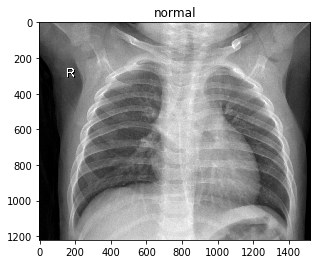

In [6]:
fig = plt.figure()
plt.title('normal')
plt.imshow(normal_images[0], cmap='gray') 

In [7]:
covid_images = []
for img_path in glob.glob(data_img + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))

## covid patients

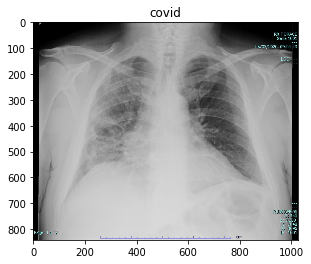

In [8]:
fig = plt.figure()
plt.title('covid')
plt.imshow(covid_images[0], cmap='gray') 

In [9]:
print(len(normal_images))
print(len(covid_images))

28
70


In [10]:
img_wid = 150
img_heigh = 150
channels = 3

In [11]:
input_shape = (img_wid, img_heigh, channels)
nb_classes = 2
epochs = 48
batch_size = 6


## Converting images to frames

In [12]:
model=Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [13]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)       

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.3)

In [16]:
train_generator = train_datagen.flow_from_directory(data_img,
                                                    target_size=(img_heigh, img_wid),
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    subset='training')

Found 69 images belonging to 3 classes.


In [17]:
validation_generator = train_datagen.flow_from_directory(data_img,target_size=(img_heigh, img_wid)
                                                         ,batch_size=batch_size,
                                                         class_mode='binary',
                                                         shuffle= False,
                                                         subset='validation')

Found 29 images belonging to 3 classes.


## Image model 

In [18]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = train_generator.samples // batch_size,
                              validation_data = validation_generator,
                              validation_steps = validation_generator.samples // batch_size,
                              epochs = epochs)


Epoch 1/48
11/11 [==============================] - 11s 996ms/step - loss: -695102.0353 - accuracy: 0.6984 - val_loss: -16252597.0000 - val_accuracy: 0.8750
Epoch 2/48
11/11 [==============================] - 12s 1s/step - loss: -330440152.9091 - accuracy: 0.6818 - val_loss: 0.0000e+00 - val_accuracy: 0.7826
Epoch 3/48
11/11 [==============================] - 12s 1s/step - loss: -5561241928.0000 - accuracy: 0.7167 - val_loss: 0.0000e+00 - val_accuracy: 0.6522
Epoch 4/48
11/11 [==============================] - 10s 886ms/step - loss: -35490241666.0317 - accuracy: 0.7302 - val_loss: 0.0000e+00 - val_accuracy: 0.6522
Epoch 5/48
11/11 [==============================] - 9s 791ms/step - loss: -127866066748.9524 - accuracy: 0.7460 - val_loss: -1070447394816.0000 - val_accuracy: 0.6522
Epoch 6/48
11/11 [==============================] - 10s 877ms/step - loss: -648907963050.6666 - accuracy: 0.6667 - val_loss: -1821014753280.0000 - val_accuracy: 0.8750
Epoch 7/48
11/11 [========================

## MODEL ACCURACY PLOT

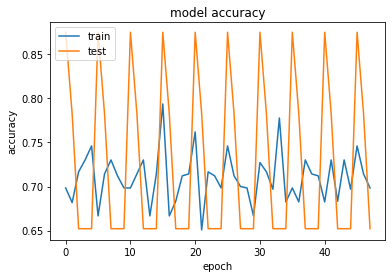

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

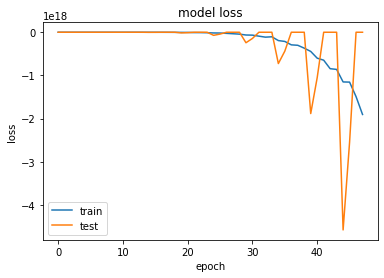

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()

In [21]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])


training_accuracy 0.6984127
validation_accuracy 0.6521739363670349


In [22]:
label = validation_generator.classes

In [23]:
pred= model.predict(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)
print(pred)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
{'.ipynb_checkpoints': 0, 'covid': 1, 'normal': 2}
['.ipynb_checkpoints', '.ipynb_checkpoints', '.ipynb_checkpoints', '.ipynb_checkpoints', '.ipynb_checkpoints', '.ipynb_checkpoints', '.ipynb_checkpoints', '.ipynb_checkpoints', '.ipynb_checkpoints', '.ipynb_checkpoints', '.ipynb_checkpoints', '.ipynb_checkpoints', '.ipynb_checkpoints', '.ipynb_checkpoints', '.ipynb_checkpoints', '.ipynb_checkpoints', '.ipynb_checkpoints', '.ipynb_checkpoints', '.ipynb_checkpoints', '.ipynb_checkpoints', '.ipynb_checkpoints', '.ipynb_checkpoints', '.ipynb_checkpoints', '.ipynb_checkpoints', '.ipynb_checkpoints', '.ipynb_checkpoints', '.ipynb_checkpoints', '.ipynb_checkpoints', '.ipynb_checkpoints']
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [24]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(predicted_class_indices,label)
cf

array([[ 0, 21,  8],
       [ 0,  0,  0],
       [ 0,  0,  0]], dtype=int64)

In [25]:
exp_series = pd.Series(label)
pred_series = pd.Series(predicted_class_indices)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,All
Actual,,
1,21,21
2,8,8
All,29,29


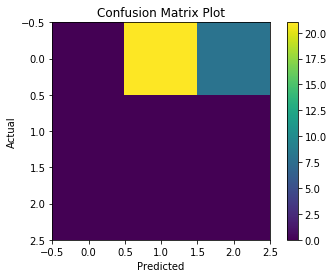

In [26]:

plt.imshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();


## saving the model

In [27]:
import pickle

In [28]:
pickle.dump(model,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [ ]:
from flask import Flask,request,jsonify,render_template
app=Flask(__name__)
@app.route('/', methods=['GET','POST'])
def predict():
    form = UploadForm()
    if form.validate_on_submit():
        print(form.photo.data)
        image_stream = form.photo.data.stream
        original_img = Image.open(image_stream)
        img = image.img_to_array(original_img)
        img = preprocess(img)
        img = np.expand_dims(img, axis=0)
        prediction =model.predict_classes(img)

    if (prediction[0][0]==0):
        result = "Covid-19 +ve"
    else:
        result = "Normal"

    byteIO = BytesIO()
    original_img.save(byteIO, format=original_img.format)
    byteArr = byteIO.getvalue()
    encoded = b64encode(byteArr)

    return render_template('result.html', result=result, encoded_photo=encoded.decode('ascii'))

    return render_template('ind.html', form=form)

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
[2020-05-25 23:11:37,761] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\hp\anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\hp\anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\hp\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\hp\anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\hp\anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "<ipython-input-29-a7cef48eb357>", line 5